skelearn.tree.DecisionTreeClassifier()

params:

1. criterion = {'gini*', 'entropy'}: The function to measure the quality of the split.

2. splitter = {'best*', 'random'}: The strategy used to choose the split at each node.

3. max_depth = {int}, (default = None): The maximum depth of the tree (***).

4. min_samples_split = {int o float}, (default = 2): The minimum number of samples required to split an internal node.

5. min_samples_leaf = {int o float} (default = 1): The minimun number of samples to be a leaf node (***)

6. max_features = int, float or {“auto”, “sqrt”, “log2”}, default=None : The number of features to consider when looking for the best split.

7. random_state = int : Controls the randomness of the estimator (***). 

8. max_leaf_nodes = int (default = None): ???

9. min_impurity_decrease = float (default = 0) : A node wil be split if this split induces a decrease of the impurity greater than or equal to this value.

10. class_weight: {dict de la forma {class_label: weigth}, o "balanced", default=None}: por default, todas las clases tienen peso 1.


In [80]:
# Importación de librearías
import pandas as pd
import numpy as np

from sklearn import impute
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

import graphviz
import matplotlib.pyplot as plt

# carga de datos
df = pd.read_csv('../data/raw/train.csv')
df_predict = pd.read_csv('../data/raw/test.csv')

df['tipo'] = "df"
df_predict['tipo'] = "df_predict"
dfw = df.append(df_predict)

# parametros 
p_features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
p_target = "Survived"

# columna Sex
dfw['Sex'][dfw['Sex'] == 'female'] = 0
dfw['Sex'][dfw['Sex'] == 'male'] = 1

# columna Age
imputador_mean = impute.SimpleImputer(missing_values=np.NaN, strategy='mean')
imputador_mean.fit(dfw[['Fare','Age']])
dfw['Age'] = imputador_mean.transform(dfw[['Fare','Age']])[:,1]
dfw['Fare'] = imputador_mean.transform(dfw[['Fare','Age']])[:,0]

# column embarked
dfw['Embarked'][dfw['Embarked'] == 'S'] = 1
dfw['Embarked'][dfw['Embarked'] == 'C'] = 2
dfw['Embarked'][dfw['Embarked'] == 'Q'] = 3

imputador_freq = impute.SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
imputador_freq.fit(dfw[['Sex','Embarked']])
dfw['Embarked'] = imputador_freq.transform(dfw[['Sex','Embarked']])[:,1]

# construcción training testing
X = dfw.loc[dfw['tipo'] == "df", p_features]
y = dfw.loc[dfw['tipo'] == "df", p_target]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)

In [81]:
# training: grid_search sobre el parámetro max_depth
acc_list = []

for i in range(1,21,1):
    modelo_1 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=i, random_state=1)
    modelo_1 = modelo_1.fit(X_train, y_train)
    y_pred_1 = modelo_1.predict(X_test)
    
    acc_modelo_1 = metrics.accuracy_score(y_test, y_pred_1)
    acc_list.append(acc_modelo_1)

print(acc_list)

print(acc_list.index(max(acc_list)))

[0.753731343283582, 0.7350746268656716, 0.7723880597014925, 0.7761194029850746, 0.7798507462686567, 0.7910447761194029, 0.7798507462686567, 0.7761194029850746, 0.7835820895522388, 0.7723880597014925, 0.7723880597014925, 0.7649253731343284, 0.7686567164179104, 0.753731343283582, 0.7649253731343284, 0.75, 0.75, 0.753731343283582, 0.75, 0.75]
5


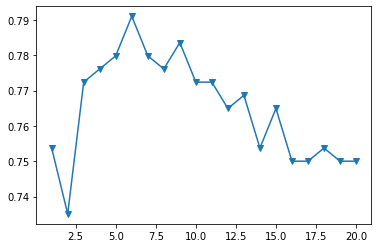

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1,21,1), acc_list, marker = "v", linestyle = "-")
plt.show()

In [83]:
    
    
    modelo_1 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=6, random_state=1)
    modelo_1 = modelo_1.fit(X_train, y_train)
    y_pred_1 = modelo_1.predict(X_test)
    
    acc_modelo_1 = metrics.accuracy_score(y_test, y_pred_1)
    print(acc_modelo_1)



0.7910447761194029


In [84]:
acc_list_2 = []

for i in range(2, 40, 2):
    modelo_1 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=6, random_state=1, min_samples_leaf=i)
    modelo_1 = modelo_1.fit(X_train, y_train)
    y_pred_1 = modelo_1.predict(X_test)

    acc_modelo_1 = metrics.accuracy_score(y_test, y_pred_1)
    acc_list_2.append(acc_modelo_1)

print(acc_list_2)

print(acc_list_2.index(max(acc_list_2)))


[0.7947761194029851, 0.7723880597014925, 0.7835820895522388, 0.7835820895522388, 0.7761194029850746, 0.7686567164179104, 0.753731343283582, 0.753731343283582, 0.753731343283582, 0.753731343283582, 0.75, 0.75, 0.75, 0.7611940298507462, 0.7611940298507462, 0.7611940298507462, 0.7611940298507462, 0.7611940298507462, 0.7723880597014925]
0


In [85]:
# valuación del modelo: visualización de arbol de decisión
aux = tree.export_graphviz(modelo_1, out_file=None, filled = True, rounded=True, feature_names=p_features)
graf = graphviz.Source(aux)
graf.render('../work/005_decision_tree_hiper_1') # exporta

'../work/005_decision_tree_hiper_1.pdf'

In [86]:
X_predict = dfw.loc[dfw['tipo'] == "df_predict", p_features]

modelo_final = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=6, random_state=1, min_samples_leaf=38)
modelo_final = modelo_final.fit(X,y)
y_pred_final = modelo_final.predict(X_predict)

df_predict['Survived'] = y_pred_final
df_final = df_predict[['PassengerId', 'Survived']]
df_final['Survived'] = df_final['Survived'].astype(int)
df_final.to_csv('../output/005_decision_tree_hiper_1.csv', index=False)